<a href="https://colab.research.google.com/github/zaheer037/Sales/blob/main/Sales_Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the dataset
data = pd.read_csv('advertising.csv')

In [ ]:
# Display the first few rows
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
# Check for null values
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
# Summary statistics
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


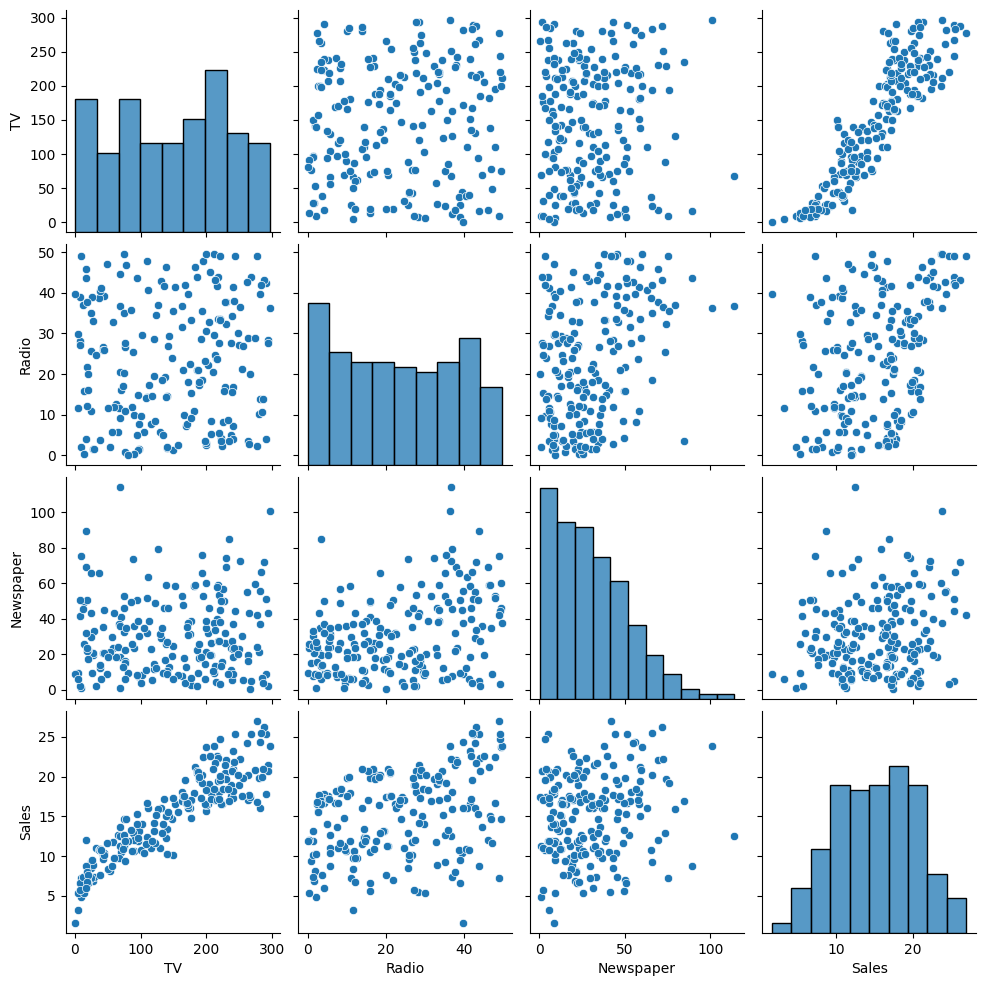

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

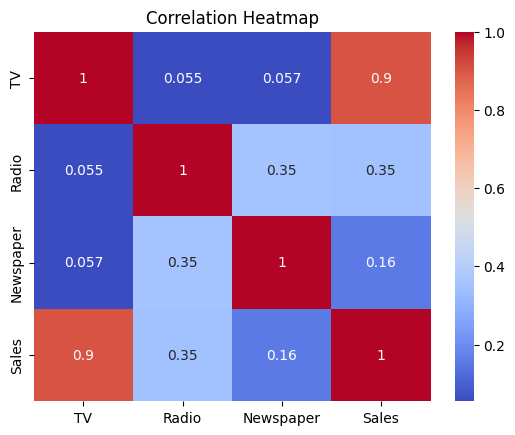

In [ ]:
# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features (TV, Radio, Newspaper) and target (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (140, 3)
Testing set size: (60, 3)


In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [0.05358869 0.10270677 0.00793167]
Intercept: 4.743766701589685


In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.54
R-squared: 0.91


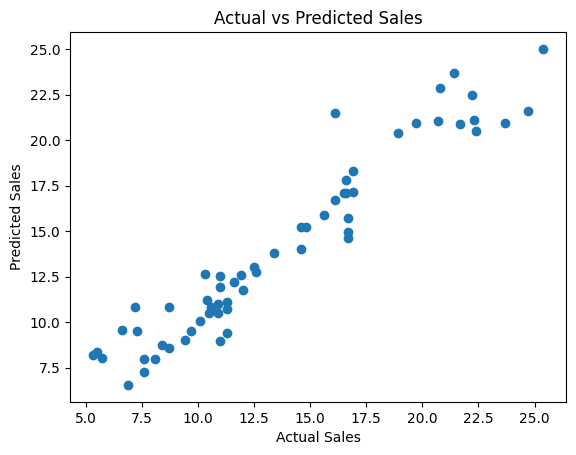

In [ ]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

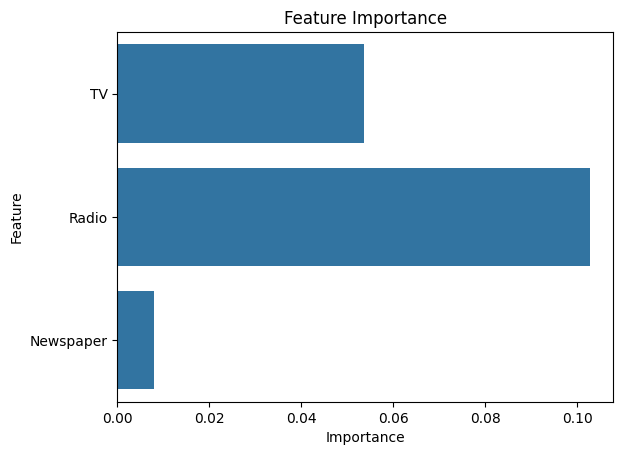

In [ ]:
# Visualize feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': ['TV', 'Radio', 'Newspaper'],
    'Importance': model.coef_
})

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_poly_pred = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Model Mean Squared Error: {mse_poly:.2f}")
print(f"Polynomial Model R-squared: {r2_poly:.2f}")

Polynomial Model Mean Squared Error: 1.50
Polynomial Model R-squared: 0.95


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print(f"Ridge R-squared: {r2_score(y_test, ridge_pred):.2f}")

# Lasso regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print(f"Lasso R-squared: {r2_score(y_test, lasso_pred):.2f}")

Ridge R-squared: 0.91
Lasso R-squared: 0.91


Recommendations for Businesses Focus on TV and Radio Advertising:

TV and Radio have the most significant impact on sales. Prioritize budget allocation to these channels for maximum ROI. Reconsider Newspaper Advertising:

Newspaper advertising has minimal influence on sales. Evaluate whether to reduce or eliminate spending on this platform. Forecasting Future Sales:

Use the trained model to predict sales based on new advertising budgets. Optimize strategies based on predicted outcomes to improve sales efficiency.